In [1]:
import os, cv2, matplotlib.pyplot as plt
from polygon import Linesearch, Graphsearch, Polysearch
dirs = os.listdir('./')
paths = [os.listdir(D) for D in dirs if os.path.isdir(D)]
paths = [os.path.join(dirs[i], paths[i][j])
        for i in range(len(paths))
        for j in range(len(paths[i]))]

<AxesSubplot:>

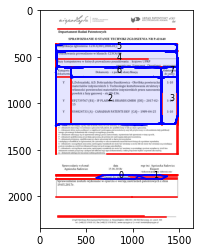

In [16]:
lineFlt = Linesearch.Filter(minlength=0.05, maxgap=5)
lineKer = Linesearch.Kernel(resolution=0.5, angle=3.14/2, treshold=0.2, spectrum=[0, 256])
grphKer = Graphsearch.Kernel(segment=0.02, distmax=2)
polyFlt = Polysearch.Filter(areamin=0.03, innermax=0.99, cyclemin=8)

I = cv2.imread(paths[5])
L = Linesearch(I, lineFlt, lineKer)
G = Graphsearch(L.lines, I.shape[1], grphKer)
P = Polysearch(G.points, G.edges, polyFlt)

plt.imshow(I, cmap='gray')
ax = L.plot()
G.plot(ax)
P.plot(ax, annotate=True)